In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

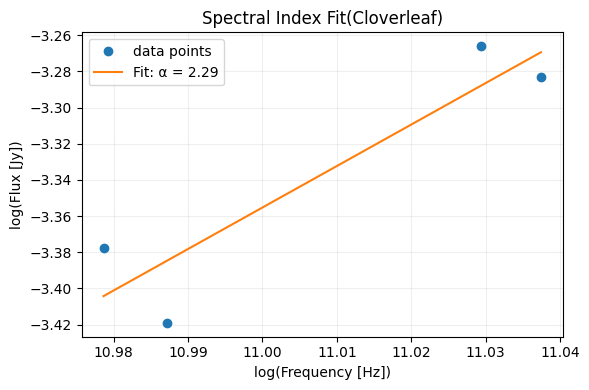

Spectral index α ≈ 2.29


In [4]:
#頻率與flux數據
freq = np.array([9.52e10,9.71e10 ,1.07e11 ,1.09e11 ])  # Hz
flux = np.array([4.19e-4,3.81e-4 ,5.42e-4 ,5.21e-4 ])  # Jy

#log-log
log_freq = np.log10(freq)
log_flux = np.log10(flux)

#線性擬合：y=αx+c
coeffs = np.polyfit(log_freq, log_flux, 1)
alpha = coeffs[0]


plt.figure(figsize=(6,4))
plt.plot(log_freq, log_flux, 'o', label='data points')
plt.plot(log_freq, np.polyval(coeffs, log_freq), '-', label=f'Fit: α = {alpha:.2f}')
plt.xlabel('log(Frequency [Hz])')
plt.ylabel('log(Flux [Jy])')
plt.title('Spectral Index Fit(Cloverleaf)')
plt.grid(True, which='both', ls='-', alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Spectral index α ≈ {alpha:.2f}")


In [3]:
'''#data
freq = np.array([9.52e10, 9.72e10, 1.07e11, 1.09e11])       # 頻率 (Hz)
flux = np.array([4.19e-4, 3.81e-4, 5.44e-4, 5.21e-4])       # Flux (Jy)
flux_err = np.array([1.92e-4, 1.26e-4, 1.67e-4, 8.7e-5])    # Flux error (Jy)

#flux的誤差
flux_err = flux 

#log-log轉換
log_freq = np.log10(freq)
log_flux = np.log10(flux)
log_flux_err = flux_err / (flux * np.log(10))# d(log y) = dy / (y * ln10)

#線性擬合
def linear_log_model(x, alpha, logC):
    return alpha * x + logC

popt, pcov = curve_fit(
    linear_log_model,
    log_freq,
    log_flux,
    sigma=log_flux_err,
    absolute_sigma=True
)
alpha, logC = popt
alpha_err, logC_err = np.sqrt(np.diag(pcov))

residuals = log_flux - linear_log_model(log_freq, *popt)
chi2 = np.sum((residuals / log_flux_err) ** 2)
dof = len(log_flux) - len(popt)
chi2_red = chi2 / dof

freq_fit = np.linspace(min(freq), max(freq), 200)
flux_fit = 10 ** (alpha * np.log10(freq_fit) + logC)

plt.errorbar(freq / 1e9, flux * 1e3, yerr=flux_err * 1e3,
             fmt='o', capsize=4, label='Data')
plt.plot(freq_fit / 1e9, flux_fit * 1e3,
         label=f'Chi-Square Fit: α = {alpha:.2f} ± {alpha_err:.2f}', color='darkgreen')

plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux Density (mJy)')
plt.title(f'Chi-Square Spectral Index Fit ($\\chi^2_\\nu$ = {chi2_red:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Spectral index α ≈ {alpha:.2f}")
'''

'#data\nfreq = np.array([9.52e10, 9.72e10, 1.07e11, 1.09e11])       # 頻率 (Hz)\nflux = np.array([4.19e-4, 3.81e-4, 5.44e-4, 5.21e-4])       # Flux (Jy)\nflux_err = np.array([1.92e-4, 1.26e-4, 1.67e-4, 8.7e-5])    # Flux error (Jy)\n\n#flux的誤差\nflux_err = flux \n\n#log-log轉換\nlog_freq = np.log10(freq)\nlog_flux = np.log10(flux)\nlog_flux_err = flux_err / (flux * np.log(10))# d(log y) = dy / (y * ln10)\n\n#線性擬合\ndef linear_log_model(x, alpha, logC):\n    return alpha * x + logC\n\npopt, pcov = curve_fit(\n    linear_log_model,\n    log_freq,\n    log_flux,\n    sigma=log_flux_err,\n    absolute_sigma=True\n)\nalpha, logC = popt\nalpha_err, logC_err = np.sqrt(np.diag(pcov))\n\nresiduals = log_flux - linear_log_model(log_freq, *popt)\nchi2 = np.sum((residuals / log_flux_err) ** 2)\ndof = len(log_flux) - len(popt)\nchi2_red = chi2 / dof\n\nfreq_fit = np.linspace(min(freq), max(freq), 200)\nflux_fit = 10 ** (alpha * np.log10(freq_fit) + logC)\n\nplt.errorbar(freq / 1e9, flux * 1e3, yerr=flux_